In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fda = pd.read_csv('../data/rcellminer.csv', index_col=0)[['FDA_STATUS', 'NSC']]
t = pd.read_csv('../DrugCell/data_rcellminer/test_DNA.txt', header=None, sep='\t')
pubchem_id =  pd.read_csv('../data/nsc_cid_smiles.csv')
approved = pubchem_id.merge(fda[fda['FDA_STATUS'] == 'FDA approved'], on='NSC').drop('FDA_STATUS', axis=1)

In [3]:
approved[approved['SMILES'] == approved['SMILES'][0]]

,NSC,CID,SMILES
0,740,126941,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...


In [4]:
translater = {pubchem_id['CID'][i]:pubchem_id['SMILES'][i] for i in pubchem_id.index}

In [5]:
corr = pd.read_csv("../DrugCell/data_rcellminer/weight_corr.csv", index_col=0)
corr['type'] = ['GO' if 'GO:' in i else 'gene' for i in corr.index]
corr = corr.T.sort_index(ascending=False).T

In [6]:
cid = 24360
SMILES = translater[cid]

# Camptothecin [PubChem ID 24360](https://pubchem.ncbi.nlm.nih.gov/compound/24360)

Camptothecin is an alkaloid isolated from the stem wood of the Chinese tree, Camptotheca acuminata. This compound selectively inhibits the nuclear enzyme DNA topoisomerase, type I. Several semisynthetic analogs of camptothecin have demonstrated antitumor activity. (from [DrugBank](https://go.drugbank.com/drugs/DB04690))

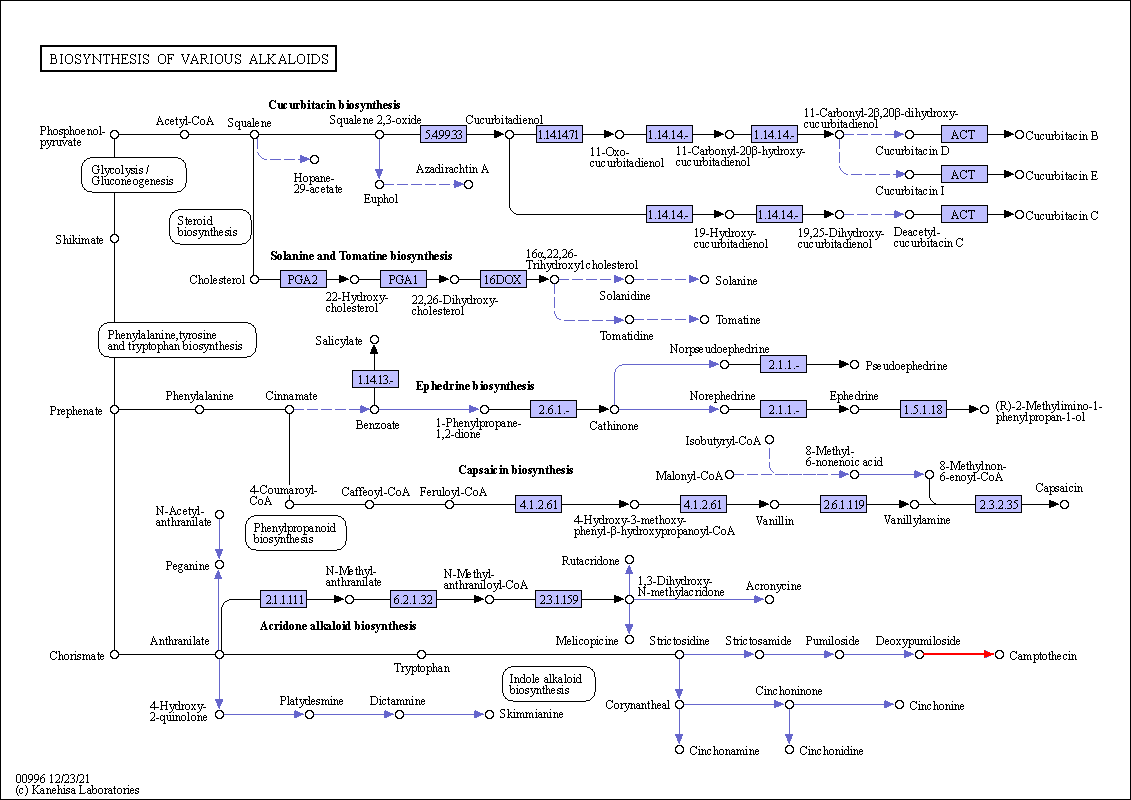
(from [KEGG Pathway](https://www.genome.jp/pathway/rn00996+R08490))

## GO information [Gene Ontoloty Blowser](http://www.informatics.jax.org/vocab/gene_ontology/GO:1901563)

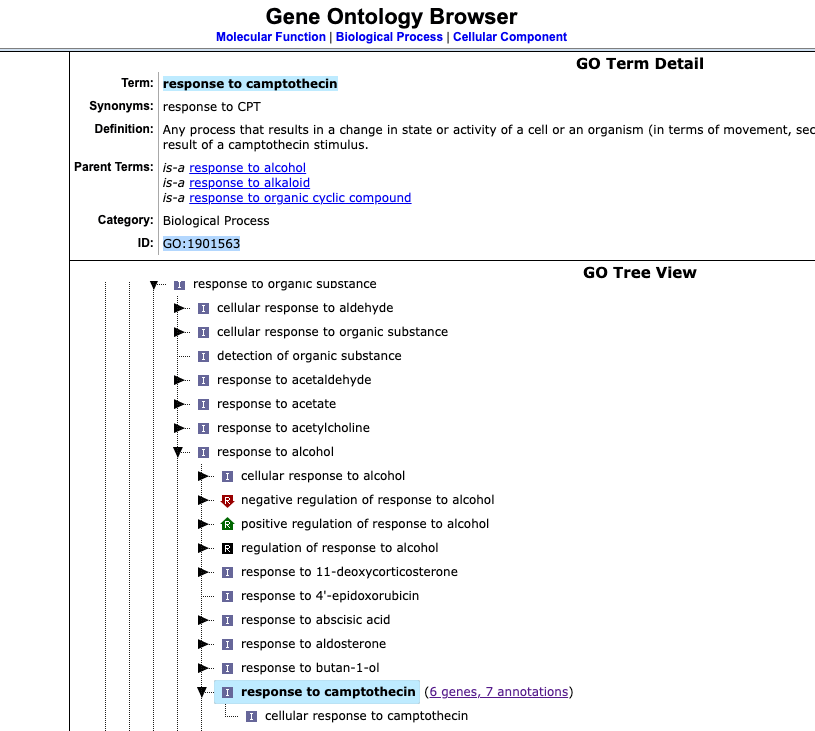

## Drug information related with GO [Gene Ontology Annotations](http://www.informatics.jax.org/go/term/GO:1901563)

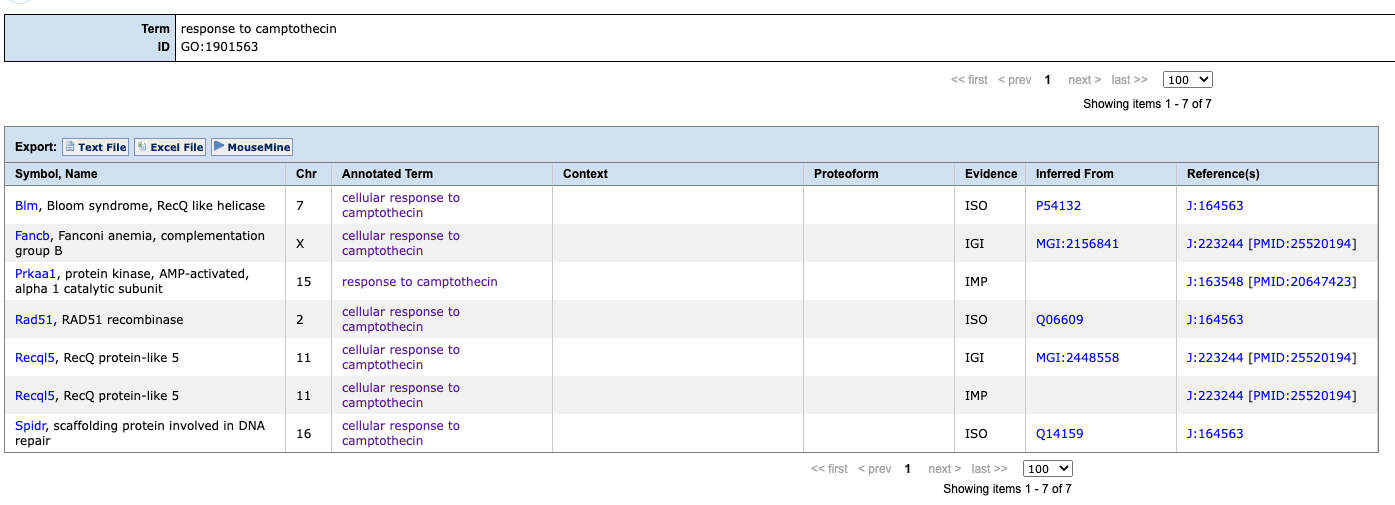

### But the worst thing is there are no information related with Camptothecin in GO file from the original DrugCell data...

In [7]:
df = pd.DataFrame(corr[corr['type'] == 'GO'][SMILES]).sort_values(SMILES)
df = df[df[SMILES] != 0]

In [8]:
df = df.drop([
    'GO:0008150', 'GO:0022900', 'GO:0007423',
    'GO:0007417', 'GO:0035295', 'GO:0071214',
    'GO:0000904', 'GO:0050804', 'GO:0071407',
    'GO:0019216',   
])

In [9]:
df

,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O
GO:0002287,-0.044335
GO:2000272,0.040006
GO:1905898,0.06532
GO:0055022,0.077968
GO:0035994,0.092383
...,...
GO:0019752,0.973719
GO:0048872,0.973907
GO:0048589,0.974492
GO:0043065,0.97468


- https://www.ebi.ac.uk/QuickGO/term/GO:0050804
- 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

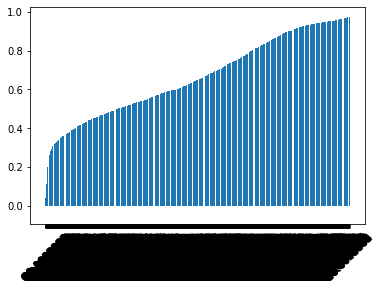

In [10]:
plt.bar(
    df.index,
    df[SMILES]
)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

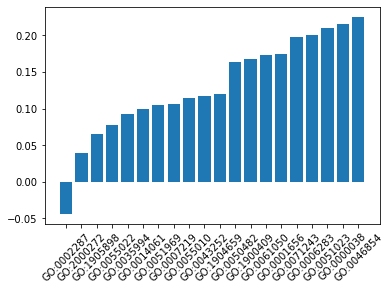

In [11]:
plt.bar(
    df.iloc[:20].index,
    df.iloc[:20][SMILES]
)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

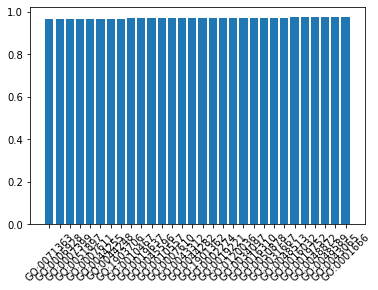

In [12]:
plt.bar(
    df.iloc[-30:].index,
    df.iloc[-30:][SMILES]
)
plt.xticks(rotation=45)

In [13]:
df.iloc[-50:]

,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O
GO:0050877,0.963283
GO:0045934,0.963669
GO:0050807,0.963669
GO:0042981,0.963669
GO:0044087,0.964056
GO:0007420,0.964056
GO:0040008,0.964056
GO:0043010,0.964442
GO:0023057,0.964442
GO:0065003,0.964829


In [14]:
df.iloc[-20:].index

Index(['GO:0045596', 'GO:0010557', 'GO:0007610', 'GO:0043312', 'GO:0044282',
       'GO:1901362', 'GO:0002274', 'GO:0019221', 'GO:0120036', 'GO:0034097',
       'GO:0016310', 'GO:0050878', 'GO:0031667', 'GO:0048513', 'GO:0016032',
       'GO:0019752', 'GO:0048872', 'GO:0048589', 'GO:0043065', 'GO:0001666'],
      dtype='object')

In [15]:
df = pd.DataFrame(corr[corr['type'] == 'gene'][SMILES]).sort_values(SMILES)
df = df[df[SMILES] != 0]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

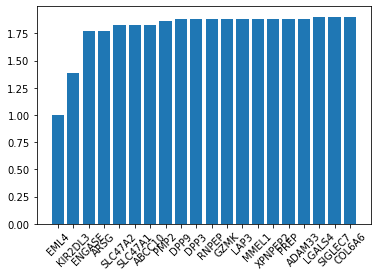

In [16]:
plt.bar(
    df.iloc[:20].index,
    df.iloc[:20][SMILES]
)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

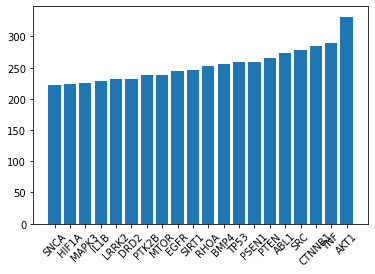

In [17]:
plt.bar(
    df.iloc[-20:].index,
    df.iloc[-20:][SMILES]
)
plt.xticks(rotation=45)